<a href="https://colab.research.google.com/github/DaffaFathir/Machine-Learning-Task/blob/main/UAS/Notebook/CNN_MNIST_Fashion_Daffa_Fathir_Fajri_1103213149.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nama    : Daffa Fathir Fajri
# NIM     : 1103213149
# Kelas   : TK-45-04
# Lecture : UAS (Image Classification)
# Dataset : MNIST FASHION

chatGPT promph : https://chatgpt.com/share/82cb5dd4-0066-4e96-bcc7-28dad6610e8d

# **Langkah 1 : Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns


# **Langkah 2 : Load Data**

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Fashion/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Fashion/fashion-mnist_test.csv')

# Pisahkan fitur dan label
x_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

x_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Reshape data ke dalam bentuk gambar 28x28
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding untuk label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# **Langkah 3 : Mendefinisikan Kategori**

In [ ]:
# Definisikan label deskriptif untuk Fashion MNIST
fashion_mnist_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# **Langkah 4 : Menampilkan 25 gambar pertama dari dataset**

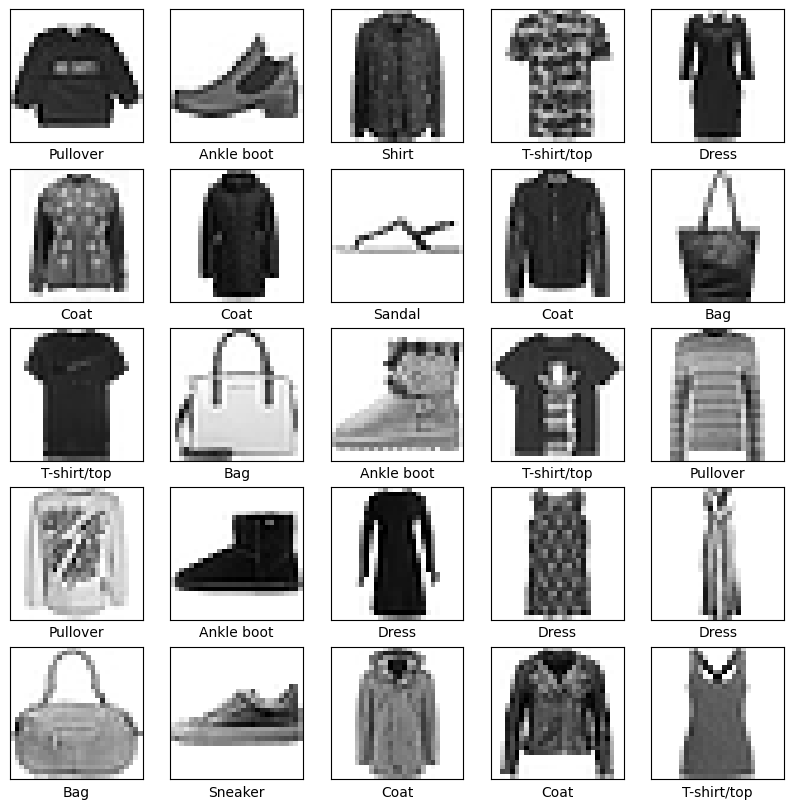

In [ ]:
def plot_images(images, labels, preds=None):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        true_label = fashion_mnist_labels[np.argmax(labels[i])]
        if preds is None:
            plt.xlabel(true_label)
        else:
            pred_label = fashion_mnist_labels[np.argmax(preds[i])]
            plt.xlabel(f'True: {true_label}\nPred: {pred_label}')
    plt.show()

# Tampilkan 25 gambar pertama dari x_train dengan label nama pakaian
plot_images(x_train, y_train)

# **langkah 5 : Pembuatan Model**

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# **Langkah 6 : Pelatihan Model**

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 53s 69ms/step - loss: 0.6946 - accuracy: 0.7449 - val_loss: 0.4535 - val_accuracy: 0.8349
Epoch 2/10
750/750 [==============================] - 49s 65ms/step - loss: 0.4866 - accuracy: 0.8230 - val_loss: 0.3759 - val_accuracy: 0.8627
Epoch 3/10
750/750 [==============================] - 50s 66ms/step - loss: 0.4297 - accuracy: 0.8431 - val_loss: 0.3399 - val_accuracy: 0.8779
Epoch 4/10
750/750 [==============================] - 48s 64ms/step - loss: 0.3918 - accuracy: 0.8581 - val_loss: 0.3203 - val_accuracy: 0.8842
Epoch 5/10
750/750 [==============================] - 48s 64ms/step - loss: 0.3623 - accuracy: 0.8683 - val_loss: 0.2931 - val_accuracy: 0.8948
Epoch 6/10
750/750 [==============================] - 48s 64ms/step - loss: 0.3436 - accuracy: 0.8743 - val_loss: 0.2846 - val_accuracy: 0.8967
Epoch 7/10
750/750 [==============================] - 48s 64ms/step - loss: 0.3309 - accuracy: 0.8804 - val_loss: 0.2787 - val_accuracy:

# **Langkah 7 : Evaluasi Model (akurasi)**

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


313/313 [==============================] - 4s 12ms/step - loss: 0.2623 - accuracy: 0.9004
Accuracy: 90.04%


# **Langkah 8 : Membuat Prediksi**

In [ ]:
# Make predictions
y_pred = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


# **Langkah 9 : Menampilkan prediksi**

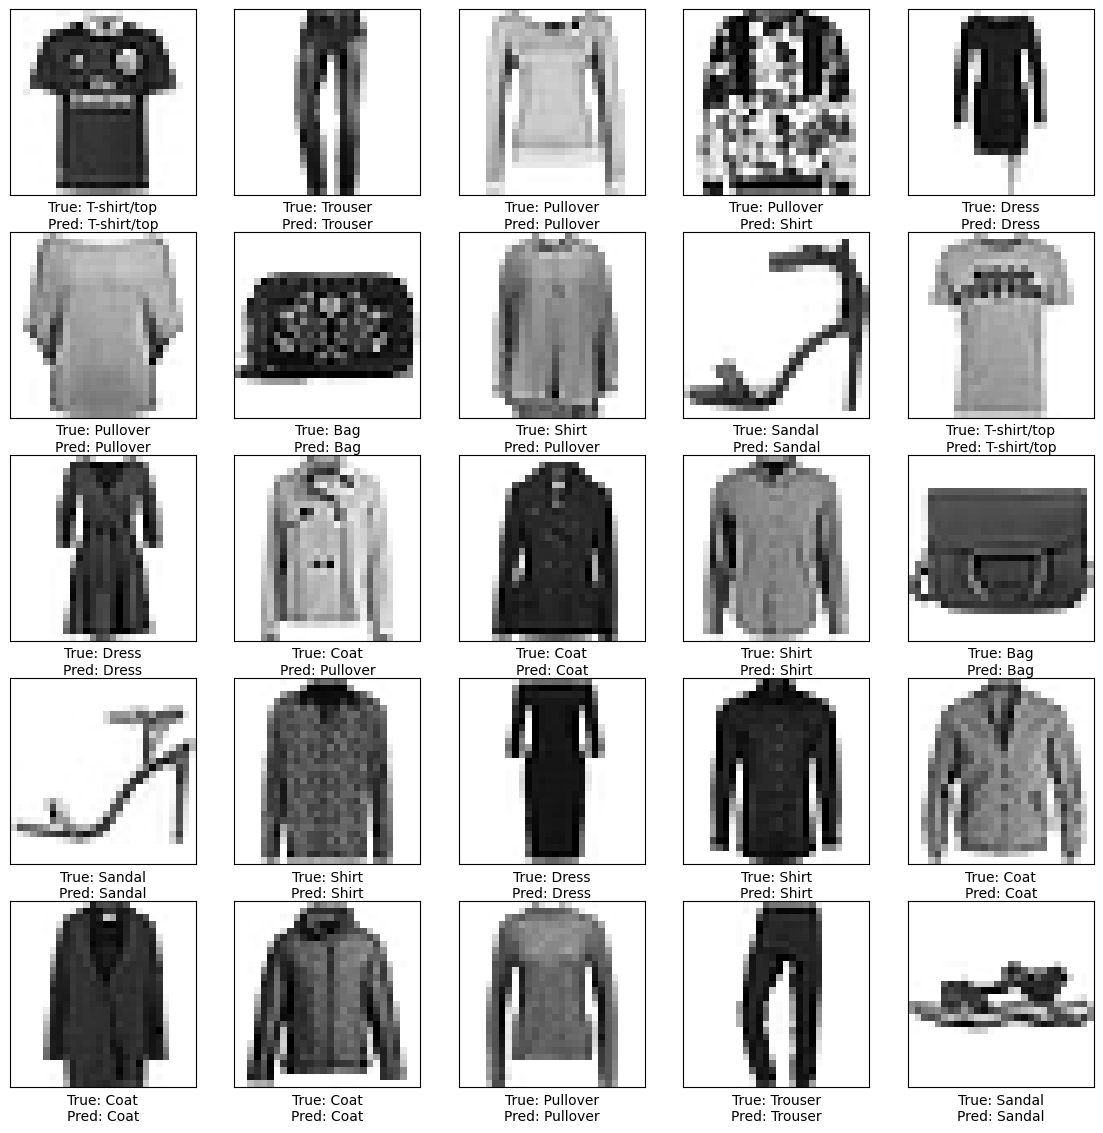

In [ ]:
# Plot category predictions
def plot_category_predictions(images, true_labels, pred_labels):
    plt.figure(figsize=(14, 14))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)

        true_label = fashion_mnist_labels[np.argmax(true_labels[i])]
        pred_label = fashion_mnist_labels[np.argmax(pred_labels[i])]

        plt.xlabel(f'True: {true_label}\nPred: {pred_label}')
    plt.show()

plot_category_predictions(x_test, y_test, y_pred)

# **Langkah 10 : Visualisasi Confussion Matrix**

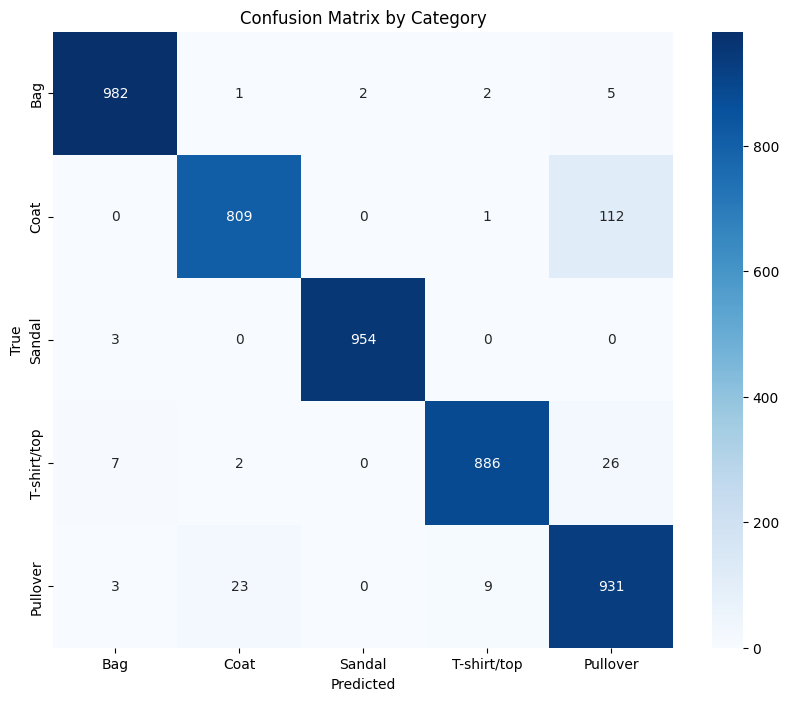

In [ ]:
# Confusion Matrix by category
y_test_category = np.array([fashion_mnist_labels[np.argmax(label)] for label in y_test])
y_pred_category = np.array([fashion_mnist_labels[np.argmax(label)] for label in y_pred])

category_labels_unique = ['Bag', 'Coat', 'Sandal', 'T-shirt/top', 'Pullover']
conf_mat_category = confusion_matrix(y_test_category, y_pred_category, labels=category_labels_unique)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_category, annot=True, fmt='d', cmap='Blues', xticklabels=category_labels_unique, yticklabels=category_labels_unique)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix by Category')
plt.show()

# **Langkah 11 : Visualisasi grafik akurasi dan grafik loss**

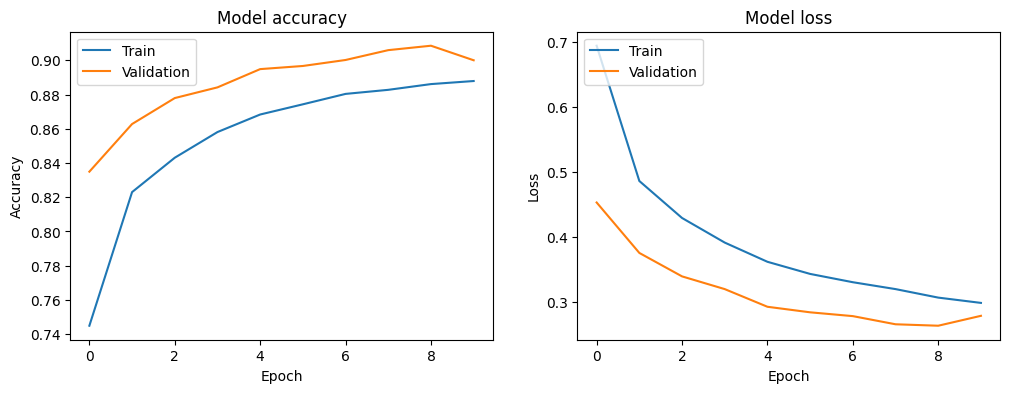

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()